In [2]:
from itertools import chain
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
import collections
import lmfit as lm

mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 8})

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'mathtext.default':  'regular' })
%matplotlib notebook
%matplotlib notebook


In [7]:
PLEData = sio.loadmat('RydbergPLEData.mat')
AbsData = sio.loadmat('AbsorptionData.mat')
AbsDataWide = sio.loadmat('AbsorptionDataWide.mat') # wider absorption data

<IPython.core.display.Javascript object>


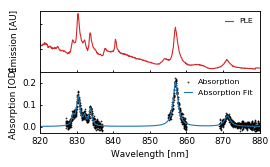

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [4]:
mm = 1/25.4
fig, ax = plt.subplots(2,1,sharex=True,figsize=(86*mm, 86*mm/1.618))
ax[0].tick_params(direction='in',length = 2)
ax[1].tick_params(direction='in',length = 2)
ax[0].plot(PLEData['OH'][0,0]['ExcitationAxis'][0],PLEData['OH'][0,0]['Spectra'][:,405],linewidth = 1,color='tab:red',label='PLE')
ax[0].yaxis.set_ticklabels([])
ax[0].set_ylabel('Emission [AU]')
ax[0].legend(framealpha=0,handlelength = 1,fontsize = 7)

ax[1].plot(AbsData['WavelengthAx'][0],AbsData['ExptData'][0],'.k',label='Absorption',ms = 1)
ax[1].plot(AbsData['WavelengthAx'][0],AbsData['FitData'][0],'-',linewidth = 1,color='tab:blue',label='Absorption Fit')
ax[1].tick_params(axis="y",direction="in")
ax[1].tick_params(axis="x",direction="in")
ax[1].legend(framealpha=0,handlelength = 1,fontsize = 7)

ax[1].set_ylim(-0.03,0.25)
ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_ylabel('Absorption [OD]')
plt.tight_layout()
fig.align_ylabels(ax)
fig.subplots_adjust(hspace = 0)

ax[0].set_xlim(820,880)
plt.show()
#fig.savefig('fig1a.pdf', format='pdf')
# fig.savefig('OpticalSpec.eps')

peaka, E0=1.535, Ry=0.444024650125
peakb, E0=1.535, Ry=0.399431860078
peakc, E0=1.535, Ry=0.357615099379
peakd, E0=1.535, Ry=0.336231357729


<IPython.core.display.Javascript object>


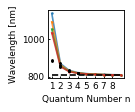

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [5]:
def RydbergModel(nvals,E0,Ry):
    return E0 - Ry/nvals**2

nmtoev = 1e7/8065.54429

peakmat = np.asarray([[871.01,833.731,822.8],[863.6,832.231,821.4],[857.001,830.383,820],[854.02,828.911,818.9]])

nval = np.asarray([2,3,4])

mod = lm.Model(RydbergModel,independent_vars=['nvals'])
pars = mod.make_params()
pars['E0'].set(1.535,vary=False)
pars['Ry'].set(0.4,vary=True)

names = ['peaka','peakb','peakc','peakd']

fitdict = {k:mod.fit(nmtoev/peaklist,pars,nvals=nval) for k,peaklist in zip(names,peakmat)}
[print(keyval+', E0='+str((fitdict[keyval].best_values)['E0'])
      +', Ry='+str((fitdict[keyval].best_values)['Ry'])
      ) for keyval in fitdict.keys()]

mm = 1/25.4

fig,ax = plt.subplots(figsize=(43*mm, 43*mm/1.2))
nall = np.arange(1,10)
ax.tick_params(direction='in',length = 2)
extrapdata = np.asarray([nmtoev/mod.eval(fitdict[keyval].params,nvals=nall) for keyval in fitdict.keys()])
[ax.plot(nall,extrapvec,'.-',markersize = 2.5,alpha=0.8) for extrapvec in extrapdata]
[ax.plot(nval,peakvec,'ko',markersize = 1.5) for peakvec in peakmat]
nval2 = np.asarray([1,1])
peakmat2 = np.asarray([886,890])
[ax.plot(nval2,peakmat2,'ko',markersize = 1.5)]
ax.plot(nall,0*nall+nmtoev/1.53,'k--')
ax.set_xlabel("Quantum Number n")
ax.set_ylabel("Wavelength [nm]")
ax.set_yscale('linear')
ax.set_xticks([1,2,3,4,5,6,7,8])
plt.tight_layout()
fig = plt.gcf()
plt.show()
fig.savefig('fig1b.pdf', format='pdf')

<IPython.core.display.Javascript object>


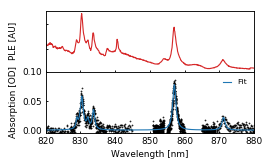

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [6]:
mm = 1/25.4
fig, ax = plt.subplots(2,1,sharex=True,figsize=(86*mm, 86*mm/1.618))
ax[0].tick_params(direction='in',length = 2)
ax[1].tick_params(direction='in',length = 2)
ax[0].plot(PLEData['OH'][0,0]['ExcitationAxis'][0],PLEData['OH'][0,0]['Spectra'][:,405],linewidth = 1,color='tab:red')
ax[0].yaxis.set_ticklabels([])
ax[0].set_ylabel('PLE [AU]')
ax[0].legend(framealpha=0,handlelength = 1,fontsize = 7)

ax[1].plot(AbsDataWide['xvals'][0],AbsDataWide['OD'][0],'.k',ms = 1)
ax[1].plot(AbsDataWide['xeval'][0],AbsDataWide['yeval'][0],'-',linewidth = 1,color='tab:blue',label='Fit')
ax[1].tick_params(axis="y",direction="in")
ax[1].tick_params(axis="x",direction="in")
ax[1].legend(framealpha=0,handlelength = 1,fontsize = 7)

ax[1].set_ylim(-0.005,0.1)
ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_ylabel('Absorption [OD]')
plt.tight_layout()
fig.align_ylabels(ax)
fig.subplots_adjust(hspace = 0)

ax[0].set_xlim(820,880)
plt.show()
fig.savefig('fig1a2.pdf', format='pdf')